<a href="https://colab.research.google.com/github/marcosjr-mackenzie/CursoMackenie---Python/blob/main/COMPUTA%C3%87%C3%83O_VISUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OpenCV: Exemplo de processamento de imagens usando Python e OpenCV.

| NOME | RA |
|-------------|-------------|
| ANDRE MATTEUCCI | 10403403 |
| ENZO CASAGRANDE | 10400726 |
| MARCOS CARVALHO | 10401844 |
| RAFAEL RUSSO  | 10401195 |


In [56]:
# IMPORTANDO A BIBLIOTECA OpenCV

import cv2 as opencv


In [57]:
# MATPLOTLIB sendo importado apenas para mostrar a imagem no JUPYTER

import matplotlib.pyplot as plt

def MostraImagemJupyter(imagem):
  X_rgb = opencv.cvtColor(imagem, opencv.COLOR_BGR2RGB)
  plt.imshow(X_rgb)
  plt.axis('off')
  plt.show()

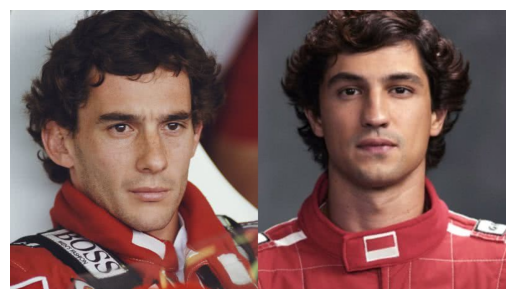

In [58]:
# CARREGANDO A IMAGEM

imagem = opencv.imread("/content/Foto_Senna.jpg")
imagem_final = imagem.copy()
MostraImagemJupyter(imagem)

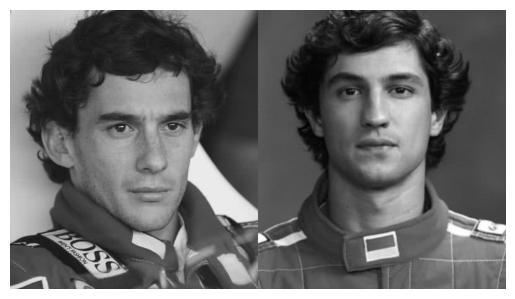

In [59]:
# CONVERTENDO A IMAGEM PARA CINZA - Modelos de imagem detectam melhor em escalas de cinza do que em imagens com cor.

imagem_cinza = opencv.cvtColor(imagem_final, opencv.COLOR_BGR2GRAY)
MostraImagemJupyter(imagem_cinza)

In [60]:
# CARREGANDO MODELOS QUE DETECTAM ROSTOS E OLHOS
modelo_rostos = opencv.CascadeClassifier(opencv.data.haarcascades + 'haarcascade_frontalface_default.xml')
modelo_olhos = opencv.CascadeClassifier(opencv.data.haarcascades + 'haarcascade_eye.xml')

In [61]:
# DETECTANDO ROSTOS NA IMAGEM - Salva em formato de lista
rostos = modelo_rostos.detectMultiScale(imagem_cinza, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

In [62]:
rostos

array([[481,  46, 215, 215],
       [115, 110, 213, 213]], dtype=int32)

In [63]:
# Para cada rosto detectado
for (x, y, w, h) in rostos:
    # Desenhar um retângulo azul ao redor do rosto
    opencv.rectangle(imagem_final, (x, y), (x + w, y + h), (255, 0, 0), 3)

    # Definir a região do rosto para detectar olhos
    cordenada_cinza = imagem_cinza[y:y + h, x:x + w]
    cordenaza_cor = imagem_final[y:y + h, x:x + w]

    # Detectar olhos dentro da região do rosto
    olhos = modelo_olhos.detectMultiScale(cordenada_cinza)

    # Para cada olho detectado, desenhar um círculo verde
    for (olho_x, olho_y, olho_w, olho_h) in olhos:
        centro_olho = (x + olho_x + olho_w // 2, y + olho_y + olho_h // 2)
        raio_olho = olho_w // 2
        opencv.circle(imagem_final, centro_olho, raio_olho, (0, 255, 0), 2)

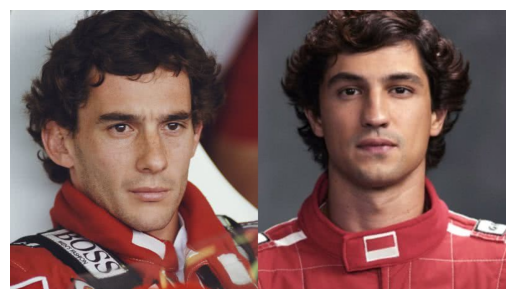

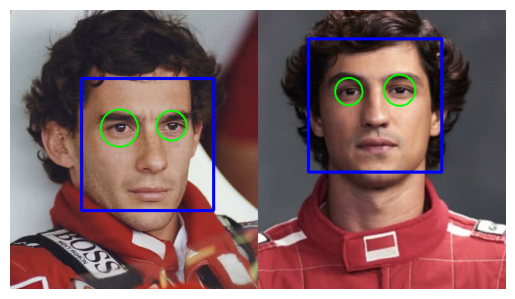

In [64]:
MostraImagemJupyter(imagem)
MostraImagemJupyter(imagem_final)